<a href="https://colab.research.google.com/github/djvaroli/samsung_oct/blob/Janhavi-Colab-Notebooks/50per_train_data_JG_oct__2_model_SimCLR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/Samsung-OCT-Project-Work/')
pwd = os.getcwd()
print(pwd)

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/Samsung-OCT-Project-Work


In [9]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/Samsung-OCT-Project-Work/processed_data/data/')
%mkdir train_data_50per
%cd train_data_50per
%mkdir 0
%mkdir 1
%mkdir 2
%mkdir 3

/content/drive/MyDrive/Colab Notebooks/Samsung-OCT-Project-Work/processed_data/data/train_data_50per


In [15]:
%pwd


'/content/drive/My Drive/Colab Notebooks/Samsung-OCT-Project-Work/processed_data/data/train_data_50per'

In [17]:
import pandas as pd
import numpy as np

def load_data(folder):
  X=[]
  Y=[]
  Z=[]
  for folderName in os.listdir(folder):
    if not folderName.startswith('.'):
      if folderName == '0':
        label = 0
      elif folderName == '1':
        label = 1
      elif folderName == '2':
        label = 2
      elif folderName == '3':
        label = 3
      else:
        label = 4

    for file in os.listdir(folder+'/'+folderName):
      if not file.startswith('.'):
        X.append(file)
        Y.append(label)
        Z.append(folder+'/'+folderName+'/'+file)
  return pd.DataFrame(np.hstack((np.asarray(X).reshape(-1,1),np.asarray(Z).reshape(-1,1), np.asarray(Y).reshape(-1,1))),columns=['filename','path','Class']).sort_values('Class')
  ###############################

In [18]:
  train_data = load_data('/content/drive/My Drive/Colab Notebooks/Samsung-OCT-Project-Work/processed_data/data/train/')
  


In [19]:
# Creating reduced train dataset
# Selecting smaller sample size 
def sample_data(data, sample_size):
  if sample_size == data.shape[0]:
    return data
  class_weights = dict(data["Class"].value_counts()/data.shape[0])
  print("Before sub-sampling=", class_weights)
  df0 = data[data["Class"]=='0'].sample(n=min(int(round(sample_size * class_weights['0'])),len(data[data["Class"]=='0'])))
  df1 = data[data["Class"]=='1'].sample(n=min(int(round(sample_size * class_weights['1'])),len(data[data["Class"]=='1'])))
  df2 = data[data["Class"]=='2'].sample(n=min(int(round(sample_size * class_weights['2'])),len(data[data["Class"]=='2'])))
  df3 = data[data["Class"]=='3'].sample(n=min(int(round(sample_size * class_weights['3'])),len(data[data["Class"]=='3'])))
  return pd.concat([df0,df1,df2,df3])

In [20]:
train_50per = int((1/50)*(train_data.shape[0]))
print("50% reduced train data sample size=",train_50per)
train_data_red = sample_data(train_data,train_50per)
class_weights = dict(train_data_red["Class"].value_counts()/train_data_red.shape[0])
print("Sub-sampled train data=", class_weights)
print(train_data.shape, train_data_red.shape)

50% reduced train data sample size= 1669
Before sub-sampling= {'0': 0.4456542571031575, '3': 0.3152101001389488, '1': 0.13593023812946192, '2': 0.1032054046284318}
Sub-sampled train data= {'0': 0.4457759137207909, '3': 0.3151587777112043, '1': 0.1360095865787897, '2': 0.1030557219892151}
(83484, 3) (1669, 3)


In [21]:
# Copying to 50 per train data
import shutil
train_files = train_data_red.path.to_list()
for filenum in range(len(train_files)):
  x = train_files[filenum]
  x_split = x.split('/')
  filename = x_split[-1]
  separator = '/'
  x_path = separator.join(x_split[:-1])
  #print(x_path)
  os.chdir(x_path)
  if '0' in x_path: 
    #print(x_path)
    shutil.copy(filename, '../../train_data_50per/0/')
  elif '1' in x_path:
    shutil.copy(filename, '../../train_data_50per/1/')
  elif '2' in x_path:
    shutil.copy(filename, '../../train_data_50per/2/')
  else:
    shutil.copy(filename, '../../train_data_50per/3/')


In [2]:
os.chdir('/content/drive/My Drive/Colab Notebooks/Samsung-OCT-Project-Work/processed_data/data/train_data_50per/')
!ls ./*/* | wc -l
os.chdir('/content/drive/My Drive/Colab Notebooks/Samsung-OCT-Project-Work/processed_data/data/test/')
!ls ./*/* | wc -l
os.chdir('/content/drive/My Drive/Colab Notebooks/Samsung-OCT-Project-Work/processed_data/data/val/')
!ls ./*/* | wc -l

1669
968
32


# Load Dataframe

#JG: Start execution 

In [4]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/simclr_tf_keras_07022021/oct_run/50per_train_data')

In [5]:
!pip install keras==2.3.1
!pip install tensorflow==2.1.0
!pip install opencv-python==4.2.0.32
!pip install scikit-learn==0.23.1
!pip install scipy==1.4.1
!pip install DateTime==4.3

     |████████████████████████████████| 378kB 13.7MB/s 
     |████████████████████████████████| 51kB 8.7MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3
     |████████████████████████████████| 421.8MB 37kB/s 
     |████████████████████████████████| 3.9MB 56.0MB/s 
     |████████████████████████████████| 450kB 45.7MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7557 sha256=a505ec1bc5129eae0a04d6c2cd9c2a3e84f407ae045195df15af5712bcef5c59
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.5.0
    Uninstalling tensorboard-2.5.0:
      Successfully uninstalled tensorboard-2.5.0
  Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Su

In [ ]:
%ls
%cd SimCLRv1-keras-tensorflow/
#!pip install -r requirements.txt

In [6]:
%ls
%cd SimCLRv1-keras-tensorflow/
%pwd

'50per_train_data_JG_oct_ 2_model_SimCLR.ipynb'   SimCLRv1-keras-tensorflow/
/content/drive/My Drive/Colab Notebooks/simclr_tf_keras_07022021/oct_run/50per_train_data/SimCLRv1-keras-tensorflow


'/content/drive/My Drive/Colab Notebooks/simclr_tf_keras_07022021/oct_run/50per_train_data/SimCLRv1-keras-tensorflow'

In [61]:
import numpy as np
import pickle
import pandas as pd
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.vgg16 import VGG16 

from evaluate_features import get_features, linear_classifier, tSNE_vis

In [65]:
train_data = pd.read_pickle('/content/drive/My Drive/Colab Notebooks/Samsung-OCT-Project-Work/processed_data/data/train_data_50per_resize/train_data_50per_df.pickle')
train_data.shape



(1669, 3)

In [9]:
train_data.loc[train_data['class_label']=='3']

,filename,class_label,class_one_hot
1143,/content/drive/My Drive/Colab Notebooks/Samsun...,3,"[0, 0, 0, 1]"
1144,/content/drive/My Drive/Colab Notebooks/Samsun...,3,"[0, 0, 0, 1]"
1145,/content/drive/My Drive/Colab Notebooks/Samsun...,3,"[0, 0, 0, 1]"
1146,/content/drive/My Drive/Colab Notebooks/Samsun...,3,"[0, 0, 0, 1]"
1147,/content/drive/My Drive/Colab Notebooks/Samsun...,3,"[0, 0, 0, 1]"
...,...,...,...
1664,/content/drive/My Drive/Colab Notebooks/Samsun...,3,"[0, 0, 0, 1]"
1665,/content/drive/My Drive/Colab Notebooks/Samsun...,3,"[0, 0, 0, 1]"
1666,/content/drive/My Drive/Colab Notebooks/Samsun...,3,"[0, 0, 0, 1]"
1667,/content/drive/My Drive/Colab Notebooks/Samsun...,3,"[0, 0, 0, 1]"


In [62]:
test_data = pd.read_pickle("/content/drive/My Drive/Colab Notebooks/Samsung-OCT-Project-Work/processed_data/data/test_resize/test_df.pickle")
test_data.loc[test_data['class_label']=='2']

,filename,class_label,class_one_hot
484,/content/drive/My Drive/Colab Notebooks/Samsun...,2,"[0, 0, 1, 0]"
485,/content/drive/My Drive/Colab Notebooks/Samsun...,2,"[0, 0, 1, 0]"
486,/content/drive/My Drive/Colab Notebooks/Samsun...,2,"[0, 0, 1, 0]"
487,/content/drive/My Drive/Colab Notebooks/Samsun...,2,"[0, 0, 1, 0]"
488,/content/drive/My Drive/Colab Notebooks/Samsun...,2,"[0, 0, 1, 0]"
...,...,...,...
721,/content/drive/My Drive/Colab Notebooks/Samsun...,2,"[0, 0, 1, 0]"
722,/content/drive/My Drive/Colab Notebooks/Samsun...,2,"[0, 0, 1, 0]"
723,/content/drive/My Drive/Colab Notebooks/Samsun...,2,"[0, 0, 1, 0]"
724,/content/drive/My Drive/Colab Notebooks/Samsun...,2,"[0, 0, 1, 0]"


In [ ]:
#NOT needed
'''for i in range(len(test_data.class_label)):
  if test_data.class_label[i] == '0':
    #print(i,test_data.class_label[i])
    test_data.class_one_hot[i] = [1,0,0,0]
    #print(i,test_data.class_one_hot[i])
  if test_data.class_label[i] == '1':
    #print(i,test_data.class_label[i])
    test_data.class_one_hot[i] = [0,1,0,0]
    #print(i,test_data.class_one_hot[i])
  if test_data.class_label[i] == '2':
    #print(i,test_data.class_label[i])
    test_data.class_one_hot[i] = [0,0,1,0]
    #print(i,test_data.class_one_hot[i]) 
  if test_data.class_label[i] == '3':
    #print(i,test_data.class_label[i])
    test_data.class_one_hot[i] = [0,0,0,1]
    #print(i,test_data.class_one_hot[i]) ''' 
  

In [63]:
val_data = pd.read_pickle("/content/drive/My Drive/Colab Notebooks/Samsung-OCT-Project-Work/processed_data/data/val_resize/val_df.pickle")
val_data.loc[val_data['class_label']=='3']

,filename,class_label,class_one_hot
24,/content/drive/My Drive/Colab Notebooks/Samsun...,3,"[0, 0, 0, 1]"
25,/content/drive/My Drive/Colab Notebooks/Samsun...,3,"[0, 0, 0, 1]"
26,/content/drive/My Drive/Colab Notebooks/Samsun...,3,"[0, 0, 0, 1]"
27,/content/drive/My Drive/Colab Notebooks/Samsun...,3,"[0, 0, 0, 1]"
28,/content/drive/My Drive/Colab Notebooks/Samsun...,3,"[0, 0, 0, 1]"
29,/content/drive/My Drive/Colab Notebooks/Samsun...,3,"[0, 0, 0, 1]"
30,/content/drive/My Drive/Colab Notebooks/Samsun...,3,"[0, 0, 0, 1]"
31,/content/drive/My Drive/Colab Notebooks/Samsun...,3,"[0, 0, 0, 1]"


In [12]:
class_labels = ["0", "1", "2", "3"]
num_classes = len(train_data['class_one_hot'][0])

print("# of training instances:", len(train_data.index), "\n")

for label in class_labels:
    print(f"# of '{label}' training instances: {(train_data.class_label == label).sum()}")
    

# of training instances: 1669 

# of '0' training instances: 744
# of '1' training instances: 227
# of '2' training instances: 172
# of '3' training instances: 526


In [66]:
df_train = train_data
df_val = val_data
df_test = test_data
print(df_train.shape,df_test.shape,df_val.shape)

(1669, 3) (968, 3) (32, 3)


In [31]:
#Not executing these 2 lines since we already have data splitted in train/val/test sets.
#Testing with train data only

df_train, df_val_test = train_test_split(df_train, test_size=0.30, random_state=42, shuffle=True)
df_val, df_test = train_test_split(df_val_test, test_size=0.50, random_state=42, shuffle=True)

print("# of training instances:", len(df_train.index), "\n")
for label in class_labels:
    print(f"# of '{label}' training instances: {(df_train.class_label == label).sum()}")
    
print()
print("# of validation instances:", len(df_val.index), "\n")
for label in class_labels:
    print(f"# of '{label}' training instances: {(df_val.class_label == label).sum()}")

print()
print("# of test instances:", len(df_test.index), "\n")
for label in class_labels:
    print(f"# of '{label}' training instances: {(df_test.class_label == label).sum()}")
    
dfs = {
    "train": df_train,
    "val": df_val,
    "test": df_test
}

# of training instances: 1168 

# of '0' training instances: 521
# of '1' training instances: 165
# of '2' training instances: 125
# of '3' training instances: 357

# of validation instances: 250 

# of '0' training instances: 112
# of '1' training instances: 24
# of '2' training instances: 24
# of '3' training instances: 90

# of test instances: 251 

# of '0' training instances: 111
# of '1' training instances: 38
# of '2' training instances: 23
# of '3' training instances: 79


In [32]:
# Img size
size = 80
height_img = size
width_img = size

input_shape = (height_img, width_img, 3)

# Load pretrained VGG16 & Feature evaluation

In [33]:
params_vgg16 = {'weights': "imagenet", 
                'include_top': False, 
                'input_shape': input_shape, 
                'pooling': None}

# Design model
base_model = VGG16(**params_vgg16)
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_66 (InputLayer)        [(None, 80, 80, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 80, 80, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 80, 80, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 40, 40, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 40, 40, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 40, 40, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 20, 20, 128)       0     

In [34]:
feat_dim = 2 * 2* 512

In [22]:
!pip install keras==2.3.1

In [35]:
import tensorflow 
from tensorflow.keras.applications.vgg16 import preprocess_input

In [36]:
from tensorflow import keras
from DataGeneratorSimCLR import DataGeneratorSimCLR as DataGenerator

# Build SimCLR-Model

In [37]:
#from DataGeneratorSimCLR import DataGeneratorSimCLR as DataGenerator
from SimCLR import SimCLR
#if it errors out, execute cell # 28 : pip install keras==2.3.1

### Properties

In [38]:
batch_size =32
# Projection_head
num_layers_ph = 2
feat_dims_ph = [2048, 128]
num_of_unfrozen_layers = 1 #Note: with 1, all weights of the base_model are still frozen (last layer is max_pool)
save_path = 'models/trashnet'

In [39]:
SimCLR = SimCLR(
        base_model = base_model,
        input_shape = input_shape,
        batch_size = batch_size,
        feat_dim = feat_dim,
        feat_dims_ph = feat_dims_ph,
        num_of_unfrozen_layers = num_of_unfrozen_layers,
        save_path = save_path
    )

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_67 (InputLayer)           [(None, 80, 80, 3)]  0                                            
__________________________________________________________________________________________________
input_68 (InputLayer)           [(None, 80, 80, 3)]  0                                            
__________________________________________________________________________________________________
input_69 (InputLayer)           [(None, 80, 80, 3)]  0                                            
__________________________________________________________________________________________________
input_70 (InputLayer)           [(None, 80, 80, 3)]  0                                            
____________________________________________________________________________________________

In [40]:
print(SimCLR)

In [41]:
params_generator = {'batch_size': batch_size,
                    'shuffle' : True,
                    'width':width_img,
                    'height': height_img,
                    'VGG': True
                   }

# Generators
data_train = DataGenerator(df_train.reset_index(drop=True), **params_generator)
data_val = DataGenerator(df_val.reset_index(drop=True), subset = "val", **params_generator) #val keeps the unity values on the same random places ~42
data_test = DataGenerator(df_test.reset_index(drop=True), subset = "test", **params_generator) #test keeps the unity values on the diagonal

In [42]:
data_train.height

80

In [43]:
data_train.df

,filename,class_label,class_one_hot
0,/content/drive/My Drive/Colab Notebooks/Samsun...,0,"[1, 0, 0, 0]"
1,/content/drive/My Drive/Colab Notebooks/Samsun...,0,"[1, 0, 0, 0]"
2,/content/drive/My Drive/Colab Notebooks/Samsun...,2,"[0, 0, 1, 0]"
3,/content/drive/My Drive/Colab Notebooks/Samsun...,1,"[0, 1, 0, 0]"
4,/content/drive/My Drive/Colab Notebooks/Samsun...,0,"[1, 0, 0, 0]"
...,...,...,...
1163,/content/drive/My Drive/Colab Notebooks/Samsun...,2,"[0, 0, 1, 0]"
1164,/content/drive/My Drive/Colab Notebooks/Samsun...,3,"[0, 0, 0, 1]"
1165,/content/drive/My Drive/Colab Notebooks/Samsun...,1,"[0, 1, 0, 0]"
1166,/content/drive/My Drive/Colab Notebooks/Samsun...,3,"[0, 0, 0, 1]"


In [44]:
y_predict_test_before = SimCLR.predict(data_test)

# SimCLR - Round 1: Only Projection head

## Training SimCLR

In [45]:
SimCLR.train(data_train, data_val, epochs = 5)

Train for 37 steps, validate for 8 steps
Epoch 1/5
36/37 [============================>.] - ETA: 16s - loss: 402.0813
Epoch 00001: val_loss improved from inf to 363.20534, saving model to models/trashnet/SimCLR/SimCLR_07_04_21h_28.h5
37/37 [==============================] - 733s 20s/step - loss: 401.0836 - val_loss: 363.2053
Epoch 2/5
36/37 [============================>.] - ETA: 0s - loss: 330.1071
Epoch 00002: val_loss improved from 363.20534 to 294.45330, saving model to models/trashnet/SimCLR/SimCLR_07_04_21h_28.h5
37/37 [==============================] - 32s 855ms/step - loss: 329.1922 - val_loss: 294.4533
Epoch 3/5
36/37 [============================>.] - ETA: 0s - loss: 264.6881
Epoch 00003: val_loss improved from 294.45330 to 232.80966, saving model to models/trashnet/SimCLR/SimCLR_07_04_21h_28.h5
37/37 [==============================] - 31s 844ms/step - loss: 263.8691 - val_loss: 232.8097
Epoch 4/5
36/37 [============================>.] - ETA: 0s - loss: 206.4726
Epoch 00004: 

In [46]:
y_predict_test_after = SimCLR.predict(data_test)

## SimCLR-output check

In [48]:
print(f"Random guess accuracy: {round(1/(2*batch_size),4)}")

print(f"accuracy - test - before: {np.round(np.sum(data_test[0][1] * y_predict_test_before[:batch_size])/(2*batch_size),2)}")
print(f"accuracy - test - after: {np.round(np.sum(data_test[0][1] * y_predict_test_after[:batch_size])/(2*batch_size),2)}")

Random guess accuracy: 0.0156
accuracy - test - before: 0.44
accuracy - test - after: 0.98


In [49]:
print("y_predict_test_before")
for i in range(min(batch_size, 15)):
    print(np.round(y_predict_test_before[i][i],2), end=" | ")
print("\n")    
print("y_predict_test_after")
for i in range(min(batch_size, 15)):
    print(np.round(y_predict_test_after[i][i],2), end=" | ")
print("\n") 
print("y_predict_test_after - Second diagonal")
for i in range(min(batch_size, 15)):
    print(np.round(y_predict_test_after[i + 2 * batch_size][i],2), end=" | ")
print("\n")    

y_predict_test_before
0.18 | 0.46 | 0.64 | 0.71 | 0.41 | 0.55 | 0.47 | 0.21 | 0.6 | 0.33 | 0.42 | 0.45 | 0.16 | 0.5 | 0.6 | 

y_predict_test_after
0.98 | 0.92 | 0.99 | 0.99 | 0.98 | 1.0 | 0.99 | 0.98 | 0.99 | 0.99 | 0.98 | 0.98 | 0.96 | 0.97 | 0.99 | 

y_predict_test_after - Second diagonal
0.96 | 0.99 | 0.97 | 1.0 | 0.97 | 0.98 | 0.98 | 0.99 | 0.99 | 0.98 | 0.99 | 0.98 | 0.99 | 0.99 | 0.9 | 



## Feature Evaluation

Note that this evaluation corresponds with the unaltered pretrained weights

In [50]:
fractions = [1.0, 0.2, 0.05]

### Logistic regression evaluation

In [51]:
features_train, y_train, feats = get_features(base_model, df_train, class_labels)
features_test, y_test, feats = get_features(base_model, df_test, class_labels)
np.count_nonzero(features_train[0])

177

In [52]:
# Training logistic regression classifier on 3 fractions of the data
# Optimal regularization is determined from a 5-fold cross-validation
for fraction in fractions:
    print(f"    ==== {fraction * 100}% of the training data used ==== \n")
    linear_classifier(features_train, y_train, features_test, y_test, class_labels, fraction = fraction)

    ==== 100.0% of the training data used ==== 

Accuracy on test: 0.72 

              precision    recall  f1-score   support

           0       0.77      0.86      0.82       111
           1       0.57      0.34      0.43        38
           2       0.43      0.26      0.32        23
           3       0.73      0.84      0.78        79

    accuracy                           0.72       251
   macro avg       0.63      0.58      0.59       251
weighted avg       0.70      0.72      0.70       251

    ==== 20.0% of the training data used ==== 

Accuracy on test: 0.69 

              precision    recall  f1-score   support

           0       0.77      0.82      0.79       111
           1       0.58      0.39      0.47        38
           2       0.31      0.22      0.26        23
           3       0.68      0.78      0.73        79

    accuracy                           0.69       251
   macro avg       0.59      0.55      0.56       251
weighted avg       0.67      0.69     

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Fine tuned model

In [53]:
batch_size_classifier = 32
params_generator_classifier = {'max_width':width_img,
                            'max_height': height_img,
                            'num_classes': num_classes,
                            'VGG': True
                            }
params_training_classifier = {'1.0':{
                                "reg_dense" : 0.005,
                                "reg_out" : 0.005,
                                "nums_of_unfrozen_layers" : [5, 5, 6, 7],
                                "lrs" : [1e-3, 1e-4, 5e-5, 5e-5],
                                "epochs" : [5, 5, 15, 10]
                                },
                              '0.2':{
                                "reg_dense" : 0.075,
                                "reg_out" : 0.01,
                                "nums_of_unfrozen_layers" : [5, 5, 6, 7],
                                "lrs" : [1e-3, 1e-4, 5e-5, 5e-5],
                                "epochs" : [5, 5, 20, 15]
                              },
                              '0.05':{
                                "reg_dense" : 0.01,
                                "reg_out" : 0.02,
                                "nums_of_unfrozen_layers" : [5, 5, 6, 7],
                                "lrs" : [1e-3, 1e-4, 5e-5, 1e-5],
                                "epochs" : [5, 5, 20, 15]
                              }                              
                            }

In [54]:
for fraction in fractions:
    print(f"    ==== {fraction * 100}% of the training data used ==== \n")
    SimCLR.train_NL_and_evaluate(dfs = dfs,
                                batch_size = batch_size_classifier,
                                params_generator = params_generator_classifier,
                                fraction = fraction,
                                class_labels = class_labels,
                                reg_dense = params_training_classifier[str(fraction)]["reg_dense"],
                                reg_out = params_training_classifier[str(fraction)]["reg_out"],
                                nums_of_unfrozen_layers = params_training_classifier[str(fraction)]["nums_of_unfrozen_layers"],
                                lrs = params_training_classifier[str(fraction)]["lrs"],
                                epochs = params_training_classifier[str(fraction)]["epochs"],
                                verbose_epoch = 0,
                                verbose_cycle = 0
                                )

    ==== 100.0% of the training data used ==== 

Best result from attempt 3
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       111
           1       0.76      0.76      0.76        38
           2       0.73      0.48      0.58        23
           3       0.81      0.89      0.85        79

    accuracy                           0.84       251
   macro avg       0.80      0.76      0.77       251
weighted avg       0.84      0.84      0.84       251

    ==== 20.0% of the training data used ==== 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best result from attempt 4
              precision    recall  f1-score   support

           0       0.82      0.96      0.89       111
           1       0.88      0.55      0.68        38
           2       0.00      0.00      0.00        23
           3       0.76      0.94      0.84        79

    accuracy                           0.80       251
   macro avg       0.62      0.61      0.60       251
weighted avg       0.74      0.80      0.76       251

    ==== 5.0% of the training data used ==== 

Best result from attempt 1
              precision    recall  f1-score   support

           0       0.79      0.93      0.85       111
           1       0.77      0.63      0.70        38
           2       0.75      0.13      0.22        23
           3       0.79      0.86      0.82        79

    accuracy                           0.79       251
   macro avg       0.78      0.64      0.65       251
weighted avg       0.79      0.79      0.76       251



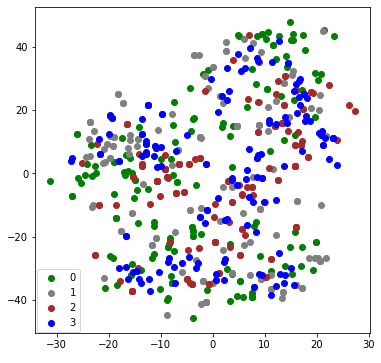

In [55]:
tSNE_vis(df_train, features_train, class_labels)

# SimCLR - Round 2: Unfreeze last convolutional layer

## Training SimCLR

In [56]:
#Unfreeze
SimCLR.unfreeze_and_train(data_train, data_val, num_of_unfrozen_layers = 2, r = 2, lr = 1e-5, epochs = 5)   

Model: "model_17"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_131 (InputLayer)          [(None, 80, 80, 3)]  0                                            
__________________________________________________________________________________________________
input_132 (InputLayer)          [(None, 80, 80, 3)]  0                                            
__________________________________________________________________________________________________
input_133 (InputLayer)          [(None, 80, 80, 3)]  0                                            
__________________________________________________________________________________________________
input_134 (InputLayer)          [(None, 80, 80, 3)]  0                                            
___________________________________________________________________________________________

## Feature Evaluation

### Logisitic regression

In [57]:
base_model = SimCLR.base_model
fractions = [1.0, 0.2, 0.05]

In [58]:
features_train, y_train, feats = get_features(base_model, df_train, class_labels)
features_test, y_test, feats = get_features(base_model, df_test, class_labels)
np.count_nonzero(features_train[0])

583

In [59]:
# Training logistic regression classifier on 3 fractions of the data
# Optimal regularization is determined from a 5-fold cross-validation
for fraction in fractions:
    print(f"    ==== {fraction * 100}% of the training data used ==== \n")
    linear_classifier(features_train, y_train, features_test, y_test, class_labels, fraction = fraction)

    ==== 100.0% of the training data used ==== 

Accuracy on test: 0.8 

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       111
           1       0.62      0.68      0.65        38
           2       0.64      0.39      0.49        23
           3       0.82      0.87      0.85        79

    accuracy                           0.80       251
   macro avg       0.74      0.71      0.71       251
weighted avg       0.80      0.80      0.80       251

    ==== 20.0% of the training data used ==== 

Accuracy on test: 0.79 

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       111
           1       0.68      0.66      0.67        38
           2       0.50      0.39      0.44        23
           3       0.81      0.86      0.83        79

    accuracy                           0.79       251
   macro avg       0.71      0.70      0.70       251
weighted avg       0.79      0.79      

### Fine tuned model

In [60]:
batch_size_classifier = 32
params_generator_classifier = {'max_width':width_img,
                            'max_height': height_img,
                            'num_classes': num_classes,
                            'VGG': True
                            }
params_training_classifier = {'1.0':{
                                "reg_dense" : 0.005,
                                "reg_out" : 0.005,
                                "nums_of_unfrozen_layers" : [5, 5, 6, 7],
                                "lrs" : [1e-3, 1e-4, 5e-5, 5e-5],
                                "epochs" : [5, 5, 15, 10]
                                },
                              '0.2':{
                                "reg_dense" : 0.075,
                                "reg_out" : 0.01,
                                "nums_of_unfrozen_layers" : [5, 5, 6, 7],
                                "lrs" : [1e-3, 1e-4, 5e-5, 5e-5],
                                "epochs" : [5, 5, 20, 15]
                              },
                              '0.05':{
                                "reg_dense" : 0.01,
                                "reg_out" : 0.02,
                                "nums_of_unfrozen_layers" : [5, 5, 6, 7],
                                "lrs" : [1e-3, 1e-4, 5e-5, 1e-5],
                                "epochs" : [5, 5, 20, 15]
                              }                              
                            }

In [61]:
for fraction in fractions:    
    print(f"    ==== {fraction * 100}% of the training data used ==== \n")
    SimCLR.train_NL_and_evaluate(dfs = dfs,
                                batch_size = batch_size_classifier,
                                params_generator = params_generator_classifier,
                                fraction = fraction,
                                class_labels = class_labels,
                                reg_dense = params_training_classifier[str(fraction)]["reg_dense"],
                                reg_out = params_training_classifier[str(fraction)]["reg_out"],
                                nums_of_unfrozen_layers = params_training_classifier[str(fraction)]["nums_of_unfrozen_layers"],
                                lrs = params_training_classifier[str(fraction)]["lrs"],
                                epochs = params_training_classifier[str(fraction)]["epochs"],
                                verbose_epoch = 0,
                                verbose_cycle = 0
                                )

    ==== 100.0% of the training data used ==== 

Best result from attempt 2
              precision    recall  f1-score   support

           0       0.89      0.92      0.91       111
           1       0.80      0.74      0.77        38
           2       0.62      0.43      0.51        23
           3       0.84      0.91      0.87        79

    accuracy                           0.84       251
   macro avg       0.79      0.75      0.76       251
weighted avg       0.84      0.84      0.84       251

    ==== 20.0% of the training data used ==== 

Best result from attempt 1
              precision    recall  f1-score   support

           0       0.86      0.95      0.91       111
           1       0.85      0.58      0.69        38
           2       0.67      0.35      0.46        23
           3       0.78      0.89      0.83        79

    accuracy                           0.82       251
   macro avg       0.79      0.69      0.72       251
weighted avg       0.82      0.82 

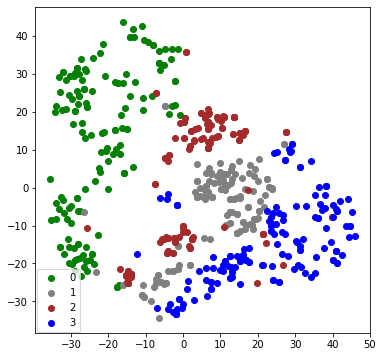

In [62]:
tSNE_vis(df_train, features_train, class_labels)

# SimCLR - Round 3: Unfreeze 2 last convolutional layer

## Training SimCLR

In [63]:
#Unfreeze
SimCLR.unfreeze_and_train(data_train, data_val, num_of_unfrozen_layers = 3, r = 3, lr = 5e-6, epochs = 5)   

Model: "model_33"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_195 (InputLayer)          [(None, 80, 80, 3)]  0                                            
__________________________________________________________________________________________________
input_196 (InputLayer)          [(None, 80, 80, 3)]  0                                            
__________________________________________________________________________________________________
input_197 (InputLayer)          [(None, 80, 80, 3)]  0                                            
__________________________________________________________________________________________________
input_198 (InputLayer)          [(None, 80, 80, 3)]  0                                            
___________________________________________________________________________________________

In [64]:
y_predict_test_after = SimCLR.predict(data_test)

## Feature Evaluation

In [65]:
base_model = SimCLR.base_model

In [66]:
features_train, y_train, feats = get_features(base_model, df_train, class_labels)
features_test, y_test, feats = get_features(base_model, df_test, class_labels)
np.count_nonzero(features_train[0])

1076

In [67]:
# Training logistic regression classifier on 3 fractions of the data
# Optimal regularization is determined from a 5-fold cross-validation
fractions = [1.0, 0.2, 0.05]
for fraction in fractions:
    print(f"    ==== {fraction * 100}% of the training data used ==== \n")
    linear_classifier(features_train, y_train, features_test, y_test, class_labels, fraction = fraction)

    ==== 100.0% of the training data used ==== 

Accuracy on test: 0.8 

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       111
           1       0.72      0.61      0.66        38
           2       0.48      0.48      0.48        23
           3       0.84      0.81      0.83        79

    accuracy                           0.80       251
   macro avg       0.72      0.70      0.71       251
weighted avg       0.79      0.80      0.79       251

    ==== 20.0% of the training data used ==== 

Accuracy on test: 0.8 

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       111
           1       0.74      0.61      0.67        38
           2       0.59      0.43      0.50        23
           3       0.80      0.81      0.81        79

    accuracy                           0.80       251
   macro avg       0.74      0.70      0.72       251
weighted avg       0.79      0.80      0

### Fine tuned model

In [68]:
batch_size_classifier = 32
params_generator_classifier = {'max_width':width_img,
                            'max_height': height_img,
                            'num_classes': num_classes,
                            'VGG': True
                        }

In [69]:
for fraction in fractions:
    print(f"    ==== {fraction * 100}% of the training data used ==== \n")
    SimCLR.train_NL_and_evaluate(dfs = dfs,
                                batch_size = batch_size_classifier,
                                params_generator = params_generator_classifier,
                                fraction = fraction,
                                class_labels = class_labels,
                                reg_dense = 0.005,
                                reg_out = 0.003,
                                nums_of_unfrozen_layers = [5, 5, 6, 7],
                                lrs = [1e-3, 1e-4, 5e-5, 1e-5],
                                epochs = [5, 5, 15, 10],
                                verbose_epoch = 0,
                                verbose_cycle = 0
                                )

    ==== 100.0% of the training data used ==== 

Learning diverged, stopped.


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best result from attempt 1
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       111
           1       0.82      0.71      0.76        38
           2       0.71      0.43      0.54        23
           3       0.82      0.89      0.85        79

    accuracy                           0.84       251
   macro avg       0.81      0.74      0.77       251
weighted avg       0.84      0.84      0.84       251

    ==== 20.0% of the training data used ==== 

Learning diverged, stopped.


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

Best result from attempt 1
              precision    recall  f1-score   support

           0       0.44      1.00      0.61       111
           1       0.00      0.00      0.00        38
           2       0.00      0.00      0.00        23
           3       0.00      0.00      0.00        79

    accuracy                           0.44       251
   macro avg       0.11      0.25      0.15       251
weighted avg       0.20      0.44      0.27       251

    ==== 5.0% of the training data used ==== 



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best result from attempt 2
              precision    recall  f1-score   support

           0       0.44      1.00      0.61       111
           1       0.00      0.00      0.00        38
           2       0.00      0.00      0.00        23
           3       0.00      0.00      0.00        79

    accuracy                           0.44       251
   macro avg       0.11      0.25      0.15       251
weighted avg       0.20      0.44      0.27       251



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


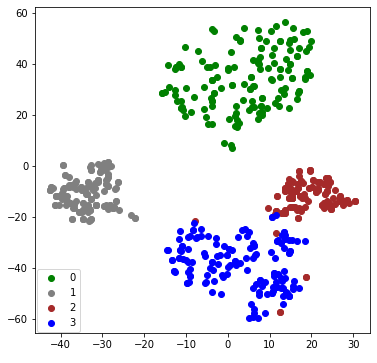

In [70]:
tSNE_vis(df_train, features_train, class_labels)

# SimCLR - Round 4: Unfreeze 3 last convolutional layer

#JG: Achieved quite good classification as seen above. Step not needed ; it leads to NaN features.

In [71]:
y_predict_test_before = y_predict_test_after

## Training SimCLR

In [72]:
#Unfreeze
SimCLR.unfreeze_and_train(data_train, 
                          data_val, 
                          num_of_unfrozen_layers = 4, 
                          r = 4, 
                          lr = 1e-6, 
                          epochs = 5)  

Model: "model_49"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_259 (InputLayer)          [(None, 80, 80, 3)]  0                                            
__________________________________________________________________________________________________
input_260 (InputLayer)          [(None, 80, 80, 3)]  0                                            
__________________________________________________________________________________________________
input_261 (InputLayer)          [(None, 80, 80, 3)]  0                                            
__________________________________________________________________________________________________
input_262 (InputLayer)          [(None, 80, 80, 3)]  0                                            
___________________________________________________________________________________________

In [73]:
y_predict_test_after = SimCLR.predict(data_test)

## Feature Evaluation

### Logistic Regression

In [74]:
base_model = SimCLR.base_model

In [75]:
features_train, y_train, feats = get_features(base_model, df_train, class_labels)
features_test, y_test, feats = get_features(base_model, df_test, class_labels)
np.count_nonzero(features_train[0])

/content/drive/My Drive/Colab Notebooks/simclr_tf_keras_07022021/oct_run/50per_train_data/SimCLRv1-keras-tensorflow/evaluate_features.py:52: RuntimeWarning: invalid value encountered in true_divide
  feat_norm = feat_un_norm / np.max(np.abs(feat_un_norm), axis=0)


2048

In [87]:
features_train_nzero = (features_train[np.nonzero(features_train)]).reshape([1168,2048])
features_test_nzero = features_test[np.nonzero(features_test)]
y_train_nzero = y_train[np.nonzero(y_train)]
y_test_nzero = y_test[np.nonzero(y_test)]
print(y_train_nzero.shape, y_train.shape, y_test_nzero.shape, y_test.shape, '\n')
print(features_train.shape)
print(features_test.shape)
print(features_test_nzero.shape)
print(features_train_nzero.shape)

(647,) (1168,) (140,) (251,) 

(1168, 2048)
(251, 2048)
(514048,)
(1168, 2048)


In [76]:
# Training logistic regression classifier on 3 fractions of the data
# Optimal regularization is determined from a 5-fold cross-validation
fractions = [1.0, 0.2, 0.05]
for fraction in fractions:
    print(f"    ==== {fraction * 100}% of the training data used ==== \n")
    linear_classifier(features_train, y_train, features_test, y_test, class_labels, fraction = fraction)

    ==== 100.0% of the training data used ==== 



ValueError: ignored

In [88]:
# Training logistic regression classifier on 3 fractions of the data
# Optimal regularization is determined from a 5-fold cross-validation
fractions = [1.0, 0.2, 0.05]
for fraction in fractions:
    print(f"    ==== {fraction * 100}% of the training data used ==== \n")
    linear_classifier(features_train, y_train_nzero, features_test, y_test_nzero, class_labels, fraction = fraction)



    ==== 100.0% of the training data used ==== 



ValueError: ignored

### Fine tuned model

In [92]:
batch_size_classifier = 32
params_generator_classifier = {'max_width':width_img,
                            'max_height': height_img,
                            'num_classes': num_classes,
                            'VGG': True
                            }
params_training_classifier = {'1.0':{
                                "reg_dense" : 0.005,
                                "reg_out" : 0.005,
                                "nums_of_unfrozen_layers" : [5, 5, 6, 7],
                                "lrs" : [1e-3, 1e-4, 5e-5, 5e-5],
                                "epochs" : [5, 5, 15, 10]
                                },
                              '0.2':{
                                "reg_dense" : 0.075,
                                "reg_out" : 0.01,
                                "nums_of_unfrozen_layers" : [5, 5, 6, 7],
                                "lrs" : [1e-3, 1e-4, 5e-5, 5e-5],
                                "epochs" : [5, 5, 20, 15]
                              },
                              '0.05':{
                                "reg_dense" : 0.01,
                                "reg_out" : 0.02,
                                "nums_of_unfrozen_layers" : [5, 5, 6, 7],
                                "lrs" : [1e-3, 1e-4, 5e-5, 1e-5],
                                "epochs" : [5, 5, 20, 15]
                              }                              
                            }

In [93]:
for fraction in fractions:    
    print(f"    ==== {fraction * 100}% of the training data used ==== \n")
    SimCLR.train_NL_and_evaluate(dfs = dfs,
                                batch_size = batch_size_classifier,
                                params_generator = params_generator_classifier,
                                fraction = fraction,
                                class_labels = class_labels,
                                reg_dense = params_training_classifier[str(fraction)]["reg_dense"],
                                reg_out = params_training_classifier[str(fraction)]["reg_out"],
                                nums_of_unfrozen_layers = params_training_classifier[str(fraction)]["nums_of_unfrozen_layers"],
                                lrs = params_training_classifier[str(fraction)]["lrs"],
                                epochs = params_training_classifier[str(fraction)]["epochs"],
                                verbose_epoch = 0,
                                verbose_cycle = 0
                                )

    ==== 100.0% of the training data used ==== 



KeyboardInterrupt: ignored

In [ ]:
tSNE_vis(df_train, features_train, class_labels)

In [100]:
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/simclr_tf_keras_07022021/oct_run/50per_train_data/SimCLRv1-keras-tensorflow'

# JG: Load pre-trained best performaing SimCLR based model trained with 1168 images only and make predictions

In [5]:
import tensorflow as tf
import json
import os
from tensorflow import keras
from tensorflow.keras.models import load_model

In [6]:
os.chdir('/content/drive/My Drive/Colab Notebooks/simclr_tf_keras_07022021/oct_run/50per_train_data/SimCLRv1-keras-tensorflow/models/trashnet/SimCLR')
%ls

SimCLR_07_04_02h_07.h5  SimCLR_07_04_22h_15.h5  SimCLR_07_04_23h_08.h5
SimCLR_07_04_21h_28.h5  SimCLR_07_04_22h_42.h5


In [1]:
!pip install 'h5py==2.10.0' --force-reinstall

  Using cached https://files.pythonhosted.org/packages/3f/c0/abde58b837e066bca19a3f7332d9d0493521d7dd6b48248451a9e3fe2214/h5py-2.10.0-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d9/5a/e7c31adbe875f2abbb91bd84cf2dc52d792b5a01506781dbcf25c91daf11/six-1.16.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/3f/03/c3526fb4e79a793498829ca570f2f868204ad9a8040afcd72d82a8f121db/numpy-1.21.0-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
ERROR: google-colab 1.0.0 has requirement six~=1.15.0, but you'll have six 1.16.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: six 1.

In [8]:
os.chdir('/content/drive/My Drive/Colab Notebooks/simclr_tf_keras_07022021/oct_run/50per_train_data/SimCLRv1-keras-tensorflow')

In [13]:
!pip install keras==2.3.1

In [14]:
from SimCLR import SimCLR

In [16]:
#model = load_model('/content/drive/My Drive/Colab Notebooks/simclr_tf_keras_07022021/oct_run/50per_train_data/SimCLRv1-keras-tensorflow/models/trashnet/SimCLR/SimCLR_07_04_22h_42.h5')
model = load_model('/content/drive/My Drive/Colab Notebooks/simclr_tf_keras_07022021/oct_run/50per_train_data/SimCLRv1-keras-tensorflow/models/trashnet/base_model/base_model_round_3.h5')
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_66 (InputLayer)        [(None, 80, 80, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 80, 80, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 80, 80, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 40, 40, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 40, 40, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 40, 40, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 20, 20, 128)       0     

In [28]:
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/simclr_tf_keras_07022021/oct_run/50per_train_data/SimCLRv1-keras-tensorflow'

In [50]:
#from swish import Swish
#from SoftmaxCosineSim import SoftmaxCosineSim

In [55]:
model2 = load_model('/content/drive/My Drive/Colab Notebooks/simclr_tf_keras_07022021/oct_run/50per_train_data/SimCLRv1-keras-tensorflow/models/trashnet/SimCLR/SimCLR_07_04_22h_42.h5', custom_objects={'SoftmaxCosineSim':SoftmaxCosineSim,'Swish':Swish})
model2.summary()

Model: "model_33"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_195 (InputLayer)          [(None, 80, 80, 3)]  0                                            
__________________________________________________________________________________________________
input_196 (InputLayer)          [(None, 80, 80, 3)]  0                                            
__________________________________________________________________________________________________
input_197 (InputLayer)          [(None, 80, 80, 3)]  0                                            
__________________________________________________________________________________________________
input_198 (InputLayer)          [(None, 80, 80, 3)]  0                                            
___________________________________________________________________________________________